# FINAL PROJECT BIG DATA ANALYTICS DTS UNS
## KLASIFIKASI INDEKS PEMBANGUNAN MANUSIA (IPM) INDONESIA PADA TAHUN 2018
##### Sumber Data : Data dan Informasi Profil Kesehatan Indonesia (Kemenkes, 2018)

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [124]:
df = pd.read_table('ipmtxt.txt')
df.head()

,Provinsi,AHH,HLS,RLS,PKD,IPM,Pertumbuhan,Klasifikasi
0,Aceh,69.64,14.27,9.09,9186,71.19,0.84,tinggi
1,Sumatera Utara,68.61,13.14,9.34,10391,71.18,0.86,tinggi
2,Sumatera Barat,69.01,13.95,8.76,10638,71.73,0.69,tinggi
3,Riau,71.19,13.11,8.92,10968,72.44,0.91,tinggi
4,Jambi,70.89,12.90,8.23,10357,70.65,0.94,tinggi


In [125]:
df.shape

(34, 8)

##### Statistik Deskriptif

In [126]:
# summarize the data
df.describe()

,AHH,HLS,RLS,PKD,IPM,Pertumbuhan
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,69.621765,13.036471,8.371765,10622.911765,70.386471,0.937941
std,2.611187,0.778748,0.953308,2167.455922,3.994151,0.256158
min,64.580000,10.830000,6.520000,7159.000000,60.060000,0.510000
25%,67.907500,12.595000,7.580000,9205.000000,68.872500,0.777500
50%,69.640000,12.990000,8.445000,10514.500000,70.645000,0.905000
75%,71.135000,13.437500,8.907500,11277.000000,71.622500,1.040000
max,74.820000,15.560000,11.050000,18128.000000,80.470000,1.700000


dari data tersebut diperoleh rata-rata angka harapan hidup 69.62, harapan rata2 lama sekolah 13.03, rata2 lama sekolah 8.37, pengeluaran per kapita perdaerah 10.622, dan rata2 IPM 70.38

In [185]:
cdf = df[['Provinsi','AHH','RLS','PKD','IPM']]
cdf.head(34)

,Provinsi,AHH,RLS,PKD,IPM
0,Aceh,69.64,9.09,9186,71.19
1,Sumatera Utara,68.61,9.34,10391,71.18
2,Sumatera Barat,69.01,8.76,10638,71.73
3,Riau,71.19,8.92,10968,72.44
4,Jambi,70.89,8.23,10357,70.65
5,Sumatera Selatan,69.41,8.00,10652,69.39
6,Bengkulu,68.84,8.61,10162,70.64
7,Lampung,70.18,7.82,9858,69.02
8,Kepulauan Bangka Belitung,70.18,7.84,12666,70.67
9,Kepulauan Riau,69.64,9.81,13976,74.84


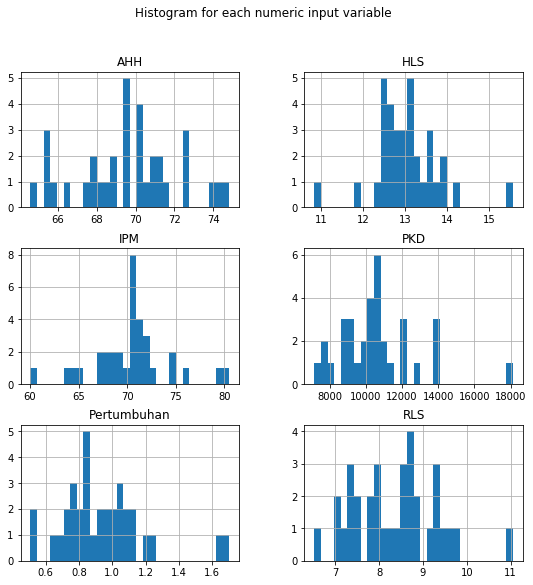

In [186]:
import pylab as pl
df.drop('Provinsi' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('provinsi_hist')
plt.show()

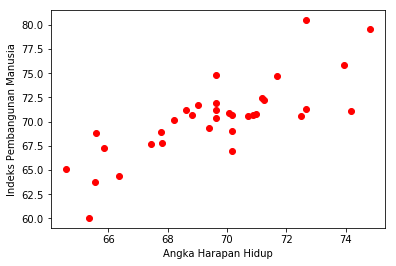

In [158]:
plt.scatter(cdf.AHH, cdf.IPM,  color='red')
plt.xlabel("Angka Harapan Hidup")
plt.ylabel("Indeks Pembangunan Manusia")
plt.show()

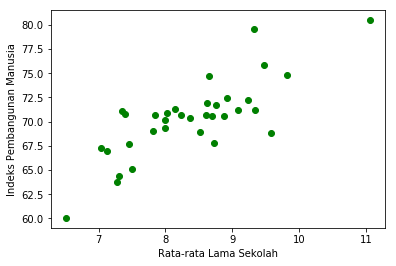

In [157]:
plt.scatter(cdf.RLS, cdf.IPM,  color='green')
plt.xlabel("Rata-rata Lama Sekolah")
plt.ylabel("Indeks Pembangunan Manusia")
plt.show()

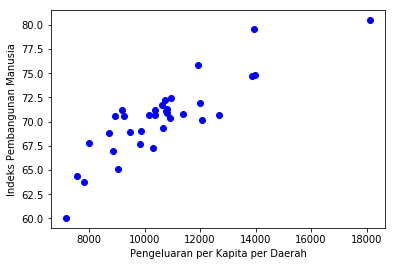

In [159]:
plt.scatter(df.PKD, df.IPM,  color='blue')
plt.xlabel("Pengeluaran per Kapita per Daerah")
plt.ylabel("Indeks Pembangunan Manusia")
plt.show()

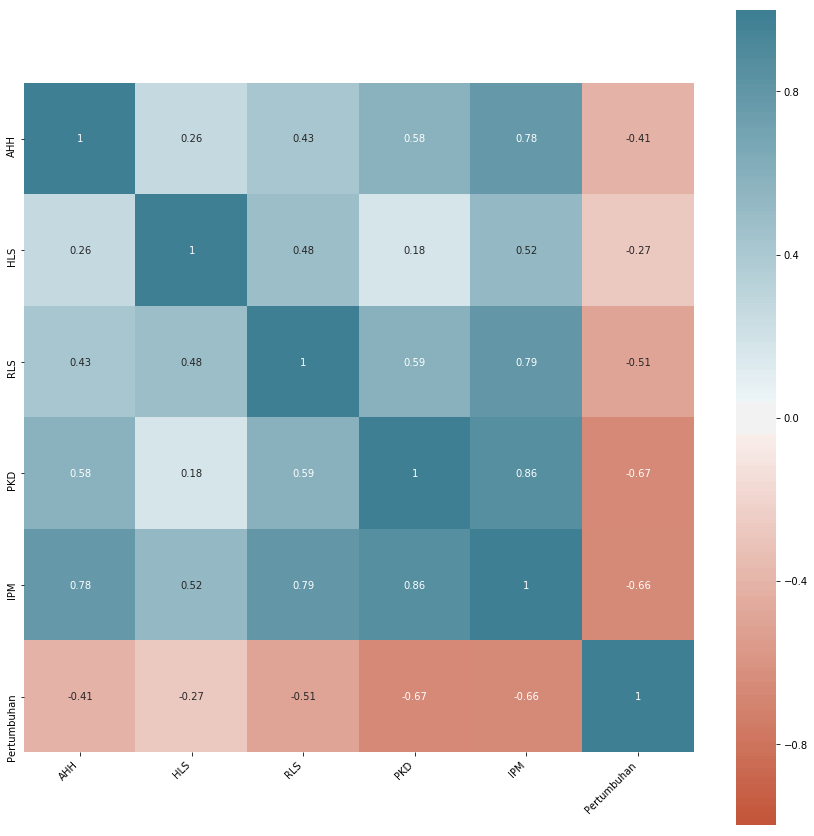

In [160]:
import seaborn as sns

plt.figure(figsize=(15,15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Regresi

In [201]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [202]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AHH']])
train_y = np.asanyarray(train[['IPM']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[1.26801773]]
Intercept:  [-17.82839936]


In [203]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['RLS']])
train_y = np.asanyarray(train[['IPM']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[3.35238049]]
Intercept:  [42.42522226]


Text(0, 0.5, 'Indeks Pembangunan Manusia')

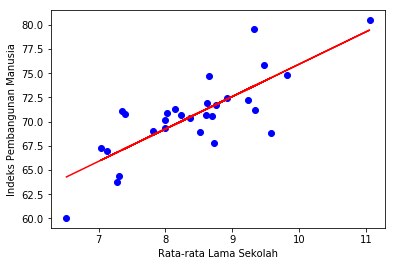

In [206]:
#Mengeplot hasil regresi
plt.scatter(train.RLS, train.IPM,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Rata-rata Lama Sekolah")
plt.ylabel("Indeks Pembangunan Manusia")

Text(0, 0.5, 'Indeks Pembangunan Manusia')

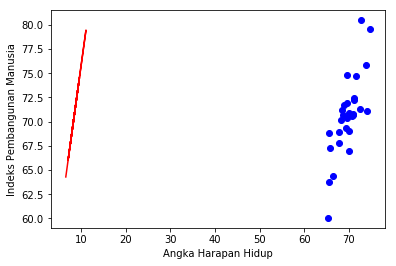

In [207]:
#Mengeplot hasil regresi
plt.scatter(train.AHH, train.IPM,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Angka Harapan Hidup")
plt.ylabel("Indeks Pembangunan Manusia")

In [209]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AHH']])
test_y = np.asanyarray(test[['RLS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 265.15
Residual sum of squares (MSE): 70377.61
R2-score: -871.02


##### Klasifikasi

In [210]:
print(df.shape)

print(df['Provinsi'].unique())

print(df.groupby('Provinsi').size())

(34, 8)
['Aceh ' 'Sumatera Utara ' 'Sumatera Barat ' 'Riau ' 'Jambi '
 'Sumatera Selatan ' 'Bengkulu ' 'Lampung ' 'Kepulauan Bangka Belitung '
 'Kepulauan Riau ' 'DKI Jakarta ' 'Jawa Barat ' 'Jawa Tengah '
 'DI Yogyakarta ' 'Jawa Timur ' 'Banten ' 'Bali ' 'Nusa Tenggara Barat '
 'Nusa Tenggara Timur ' 'Kalimantan Barat ' 'Kalimantan Tengah '
 'Kalimantan Selatan ' 'Kalimantan Timur ' 'Kalimantan Utara '
 'Sulawesi Utara ' 'Sulawesi Tengah ' 'Sulawesi Selatan '
 'Sulawesi Tenggara ' 'Gorontalo ' 'Sulawesi Barat ' 'Maluku '
 'Maluku Utara ' 'Papua Barat ' 'Papua ']
Provinsi
Aceh                          1
Bali                          1
Banten                        1
Bengkulu                      1
DI Yogyakarta                 1
DKI Jakarta                   1
Gorontalo                     1
Jambi                         1
Jawa Barat                    1
Jawa Tengah                   1
Jawa Timur                    1
Kalimantan Barat              1
Kalimantan Selatan            1
Kalim

In [211]:
print(df.shape)

print(df['Provinsi'].unique())

print(df.groupby('Klasifikasi').size())

(34, 8)
['Aceh ' 'Sumatera Utara ' 'Sumatera Barat ' 'Riau ' 'Jambi '
 'Sumatera Selatan ' 'Bengkulu ' 'Lampung ' 'Kepulauan Bangka Belitung '
 'Kepulauan Riau ' 'DKI Jakarta ' 'Jawa Barat ' 'Jawa Tengah '
 'DI Yogyakarta ' 'Jawa Timur ' 'Banten ' 'Bali ' 'Nusa Tenggara Barat '
 'Nusa Tenggara Timur ' 'Kalimantan Barat ' 'Kalimantan Tengah '
 'Kalimantan Selatan ' 'Kalimantan Timur ' 'Kalimantan Utara '
 'Sulawesi Utara ' 'Sulawesi Tengah ' 'Sulawesi Selatan '
 'Sulawesi Tenggara ' 'Gorontalo ' 'Sulawesi Barat ' 'Maluku '
 'Maluku Utara ' 'Papua Barat ' 'Papua ']
Klasifikasi
sangat tinggi     1
sedang           12
tinggi           21
dtype: int64


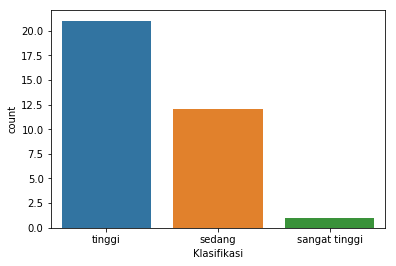

In [212]:
import seaborn as sns
sns.countplot(df['Klasifikasi'],label="count")
plt.show()

In [143]:
plt.pie(df.values(), autopct = '%1.0f%%', labels = df)
plt.show()

TypeError: 'numpy.ndarray' object is not callable

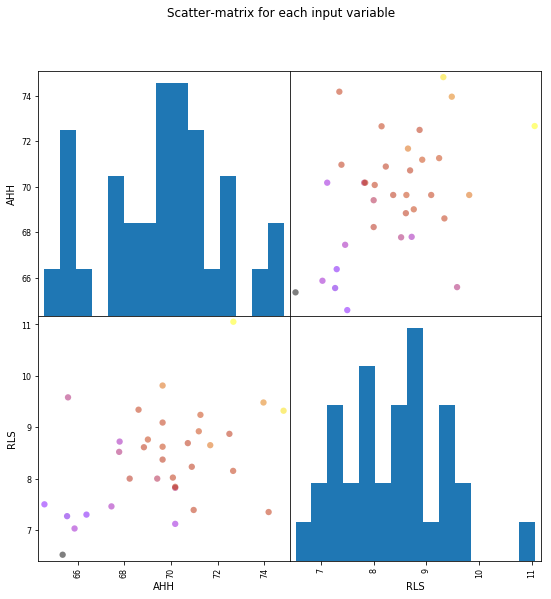

In [144]:
from pandas.plotting import scatter_matrix #aslinya: pandas.tools.plotting
from matplotlib import cm
feature_names = ['AHH', 'RLS']
x = df[feature_names]
y = df['IPM']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('ipm_matrix')

In [146]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

test_x = scaler.transform(test_x)

In [150]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor().fit(train_x, train_y)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(train_x, train_y)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(train_x, train_y)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
